# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Laramie\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
news_key = os.getenv('newsapi_key')
type(news_key)

str

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=news_key)

In [4]:
analyzer = SentimentIntensityAnalyzer()

In [5]:
def allnews_to_df(query, return_dict= False):
    """returns all articles from NewsApi to a dataframe by default"""
    your_news = newsapi.get_everything(q= query, language='en')
    if return_dict == False:
        return pd.DataFrame.from_dict(your_news['articles'])
    else:
        return your_news

In [6]:
def get_sentiment(query):
    """pass a query, get a dataframe with the polarity scores, date, and content for your query"""
    your_news = newsapi.get_everything(q= query, language='en')
    analyzer = SentimentIntensityAnalyzer()
    sentiment_list = []
    for article in your_news['articles']:
        try:
            sentiment = analyzer.polarity_scores(article['content'])
            sentiment_list.append({
            "text": article['content'],
            "date": article["publishedAt"][:10],
            "compound": sentiment["compound"],
            "positive": sentiment["pos"],
            "negative": sentiment["neu"],
            "neutral": sentiment["neg"] 
        })
        except AttributeError:
            pass
    return pd.DataFrame(sentiment_list)

In [7]:
btc_df = get_sentiment('BITCOIN')
btc_df['text'][0]

'Now, even though there are a number of women-focused crypto spaces, Odeniran says women are still underrepresented. Ive been in spaces where Im the only Black person, or the only woman, or the only B… [+3828 chars]'

In [8]:
# Create the Bitcoin sentiment scores DataFrame
# Create the Ethereum sentiment scores DataFrame
btc_df = get_sentiment('BITCOIN')
eth_df = get_sentiment('ETHEREUM')
display(btc_df.head())
display(eth_df.head())

,text,date,compound,positive,negative,neutral
0,"Now, even though there are a number of women-f...",2022-05-10,0.0772,0.036,0.964,0.000
1,A Bitcoin mining site powered by otherwise los...,2022-05-04,-0.0516,0.056,0.882,0.061
2,Wikipedia editors have voted in favor of dropp...,2022-04-14,0.4019,0.088,0.912,0.000
3,Warren Buffett has always been a bitcoin skept...,2022-05-02,-0.3269,0.085,0.772,0.143
4,"Image source, Getty Images\r\nThe value of Bit...",2022-05-09,0.3400,0.072,0.928,0.000


,text,date,compound,positive,negative,neutral
0,The US Department of Treasury says Lazarus is ...,2022-04-14,-0.7845,0.088,0.681,0.231
1,"18 with 15 posters participating, including st...",2022-04-13,0.1027,0.084,0.844,0.071
2,Meta has revealed more of how NFTs will work o...,2022-05-10,0.6486,0.135,0.865,0.000
3,"Opera launched its dedicated ""Crypto Browser"" ...",2022-04-15,0.7351,0.188,0.812,0.000
4,A multi-billion dollar cryptocurrency company ...,2022-05-02,-0.2263,0.046,0.879,0.075


In [9]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.082600,0.078800,0.862350,0.058850
std,0.368099,0.063205,0.092202,0.060548
min,-0.440400,0.000000,0.557000,0.000000
25%,-0.273200,0.040500,0.831500,0.000000
50%,0.089950,0.077000,0.879500,0.063000
75%,0.355075,0.085750,0.924250,0.072500
max,0.750600,0.202000,0.964000,0.241000


In [10]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.00000,20.000000,20.000000
mean,-0.102445,0.04415,0.888850,0.066950
std,0.442160,0.05859,0.079955,0.073236
min,-0.784500,0.00000,0.681000,0.000000
25%,-0.317450,0.00000,0.840250,0.000000
50%,-0.249750,0.00000,0.921000,0.063000
75%,0.144925,0.07950,0.937000,0.077750
max,0.735100,0.18800,1.000000,0.233000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_expand = set(['chars'])

In [13]:
# Complete the tokenizer function
def tokenizer(df_text_col):
    """Tokenizes text."""
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z]")

    clean_text = [regex.sub(' ',text) for text in df_text_col]
    
    # Create a tokenized list of the words
    w_tokens = [word_tokenize(word.lower()) for word in clean_text]
    
    
    # Lemmatize words into root words
    output = []
    for list in w_tokens: 
        output.append([lemmatizer.lemmatize(word) for word in list if word not in sw.union(sw_expand)])

    return output

In [14]:
# Create a new tokens column for Bitcoin
btc_df['word_tokens'] = tokenizer(btc_df['text'])
btc_df.head()

,text,date,compound,positive,negative,neutral,word_tokens
0,"Now, even though there are a number of women-f...",2022-05-10,0.0772,0.036,0.964,0.000,"[even, though, number, woman, focused, crypto,..."
1,A Bitcoin mining site powered by otherwise los...,2022-05-04,-0.0516,0.056,0.882,0.061,"[bitcoin, mining, site, powered, otherwise, lo..."
2,Wikipedia editors have voted in favor of dropp...,2022-04-14,0.4019,0.088,0.912,0.000,"[wikipedia, editor, voted, favor, dropping, cr..."
3,Warren Buffett has always been a bitcoin skept...,2022-05-02,-0.3269,0.085,0.772,0.143,"[warren, buffett, always, bitcoin, skeptic, bi..."
4,"Image source, Getty Images\r\nThe value of Bit...",2022-05-09,0.3400,0.072,0.928,0.000,"[image, source, getty, image, value, bitcoin, ..."


In [15]:
# Create a new tokens column for Ethereum
eth_df['word_tokens'] = tokenizer(eth_df['text'])
eth_df['word_tokens'][0]

['u',
 'department',
 'treasury',
 'say',
 'lazarus',
 'behind',
 'attack',
 'u',
 'treasury',
 'department',
 'blame',
 'north',
 'korean',
 'hacking',
 'group',
 'lazarus',
 'stealing',
 'million',
 'cryptocurrency',
 'ronin',
 'networ']

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2

# We need to look at all the word tokens together, or just flatten out the list of lists in our 'word_tokens' column. We'll make a quick funtion to do that
def flatten(list_of_lists):
    # Read: take a list out of the nested lists, and put the item from that sublist in a list
    return [item for sublist in list_of_lists for item in sublist]


In [18]:

# We'll call the function and save the entire list to a variable
btc_all_tokens= flatten(btc_df['word_tokens'].to_list())

# Now we'll use this for the ngrams method call
bigram_totals = Counter(ngrams(btc_all_tokens, n=2))
print(dict(bigram_totals))



{('even', 'though'): 1, ('though', 'number'): 1, ('number', 'woman'): 1, ('woman', 'focused'): 1, ('focused', 'crypto'): 1, ('crypto', 'space'): 1, ('space', 'odeniran'): 1, ('odeniran', 'say'): 1, ('say', 'woman'): 1, ('woman', 'still'): 1, ('still', 'underrepresented'): 1, ('underrepresented', 'ive'): 1, ('ive', 'space'): 1, ('space', 'im'): 1, ('im', 'black'): 1, ('black', 'person'): 1, ('person', 'woman'): 1, ('woman', 'b'): 1, ('b', 'bitcoin'): 1, ('bitcoin', 'mining'): 1, ('mining', 'site'): 1, ('site', 'powered'): 1, ('powered', 'otherwise'): 1, ('otherwise', 'lost'): 1, ('lost', 'gas'): 1, ('gas', 'oil'): 1, ('oil', 'well'): 1, ('well', 'near'): 1, ('near', 'linden'): 1, ('linden', 'texas'): 1, ('texas', 'april'): 1, ('april', 'th'): 1, ('th', 'photo'): 1, ('photo', 'francois'): 1, ('francois', 'picard'): 1, ('picard', 'afp'): 1, ('afp', 'via'): 1, ('via', 'getty'): 1, ('getty', 'image'): 2, ('image', 'corporate'): 1, ('corporate', 'climate'): 1, ('climate', 'hype'): 1, ('hype'

In [19]:
# Generate the Ethereum N-grams where N=2
eth_all_tokens= flatten(eth_df['word_tokens'].to_list())

bigram_totals = Counter(ngrams(eth_all_tokens, n=2))
print(dict(bigram_totals))

{('u', 'department'): 1, ('department', 'treasury'): 1, ('treasury', 'say'): 1, ('say', 'lazarus'): 1, ('lazarus', 'behind'): 1, ('behind', 'attack'): 1, ('attack', 'u'): 1, ('u', 'treasury'): 1, ('treasury', 'department'): 1, ('department', 'blame'): 1, ('blame', 'north'): 1, ('north', 'korean'): 1, ('korean', 'hacking'): 1, ('hacking', 'group'): 1, ('group', 'lazarus'): 1, ('lazarus', 'stealing'): 1, ('stealing', 'million'): 1, ('million', 'cryptocurrency'): 1, ('cryptocurrency', 'ronin'): 1, ('ronin', 'networ'): 1, ('networ', 'poster'): 1, ('poster', 'participating'): 2, ('participating', 'including'): 1, ('including', 'story'): 1, ('story', 'author'): 1, ('author', 'long'): 1, ('long', 'time'): 1, ('time', 'wikipedia'): 1, ('wikipedia', 'editor'): 1, ('editor', 'requested'): 1, ('requested', 'wikimedia'): 1, ('wikimedia', 'foundation'): 1, ('foundation', 'stop'): 1, ('stop', 'accepting'): 1, ('accepting', 'cryptocurrency'): 1, ('cryptocurrency', 'donation'): 1, ('donation', 'founda

In [20]:
# Function token_count generates the top N words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    top_10 = dict(Counter(tokens).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])

In [21]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_all_tokens)

,word,count
0,bitcoin,16
1,cryptocurrency,10
2,world,5
3,reuters,5
4,april,4
5,online,4
6,dropped,4
7,week,4
8,woman,3
9,crypto,3


In [22]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_all_tokens)

,word,count
0,cryptocurrency,9
1,bitcoin,9
2,ethereum,7
3,year,5
4,u,4
5,april,4
6,biggest,4
7,reuters,4
8,world,4
9,known,4


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [24]:
def gen_wordcloud(user_tokens):
    wc_input = ' '.join(user_tokens)
    wc = WordCloud().generate(wc_input)
    plt.imshow(wc)


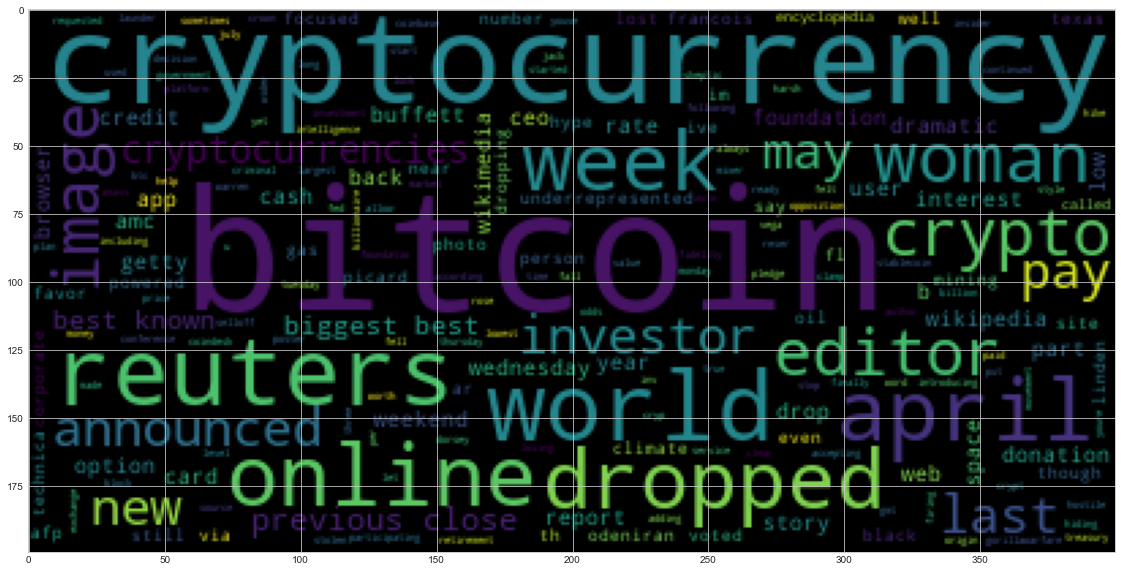

In [25]:
# Generate the Bitcoin word cloud
gen_wordcloud(btc_all_tokens)

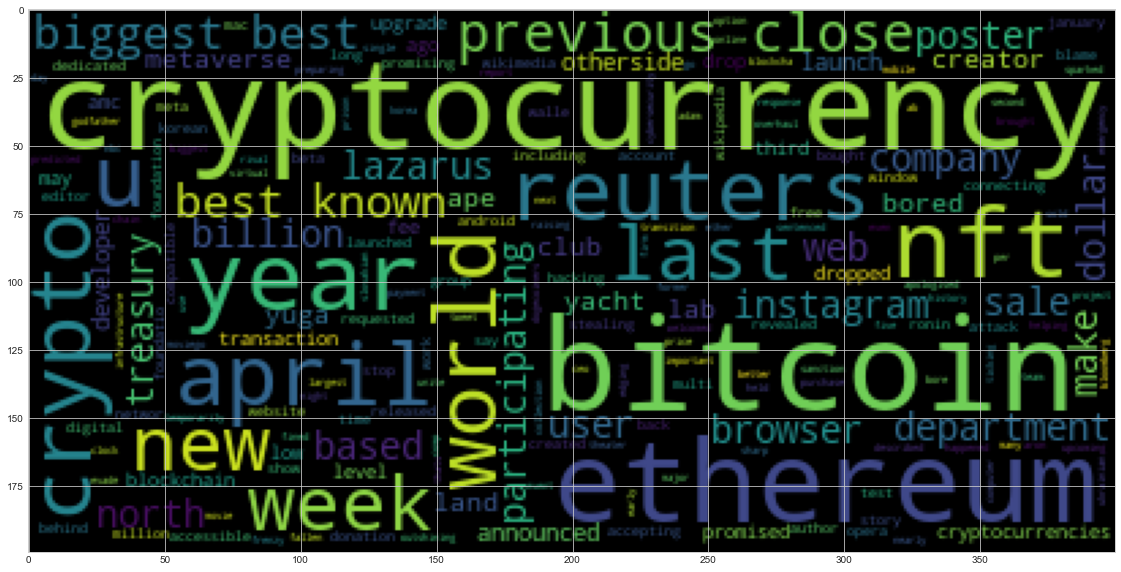

In [26]:
# Generate the Ethereum word cloud
gen_wordcloud(eth_all_tokens)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [27]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!

In [28]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [29]:
# Render the visualization
# YOUR CODE HERE!

In [30]:
# List all Entities
# YOUR CODE HERE!

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

In [32]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [33]:
# Render the visualization
# YOUR CODE HERE!

In [34]:
# List all Entities
# YOUR CODE HERE!

---